<a href="https://colab.research.google.com/github/nannthd/Project/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

Tensorflow ก็คือ deep learning library ของกูเกิ้ล ที่กำลังเป็นดาวเด่นอยู่ในตอนนี้, โดยทาง Google ก็ได้ใช้ machine learning เพิ่มประสิทธิภาพกับผลิตภัณฑ์มากมาย ไม่ว่าจะเป็น เครื่องมือค้นหา (search engine), การแปลภาษา (translation), คำบรรยายภาพ (image captioning) และ เครื่องมือช่วยการเสนอแนะ (recommendations)

In [ ]:
#import cv2
#import matplotlib.pyplot as plt

# Read the image
#img = cv2.imread('.jpg')

# Convert the image to RGB
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
##plt.imshow(img)
#plt.show()
#การเตรียมข้อมูล: อ่านภาพโครโมโซมและแปลงให้อยู่ในรูปแบบที่เหมาะสมสำหรับการประมวลผล
# เช่น แปลงให้เป็นภาพขาว-ดำ (grayscale) หรือแปลงให้เป็นเวกเตอร์คุณลักษณะ (feature vector)
# โดยใช้เทคนิคต่างๆ เช่น การฟีเจอร์เอ็กซ์ทรักชัน (texture extraction) 
#หรือการซีแคนน์ (z-score normalization) เป็นต้น

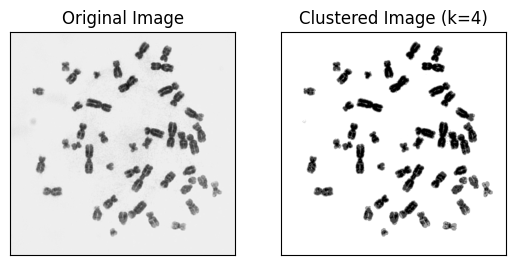

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('chromosome.jpg', cv2.IMREAD_GRAYSCALE)

# Reshape the image to a 2D array of pixels
pixels = img.reshape((-1, 1))

# Convert the pixel values to float32
pixels = np.float32(pixels)

# Define the criteria for K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Perform K-means clustering with k=4
k = 4
ret, label, center = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the center values to uint8
center = np.uint8(center)

# Reshape the label array to the shape of the original image
label = label.reshape(img.shape)

# Create a new image where each pixel is assigned the value of the center of its cluster
clustered_img = center[label]

# Display the original and clustered images
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(clustered_img, cmap='gray')
plt.title('Clustered Image (k=4)')
plt.xticks([])
plt.yticks([])

plt.show()

## 25/4 หาวิธี เรียนรู้

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


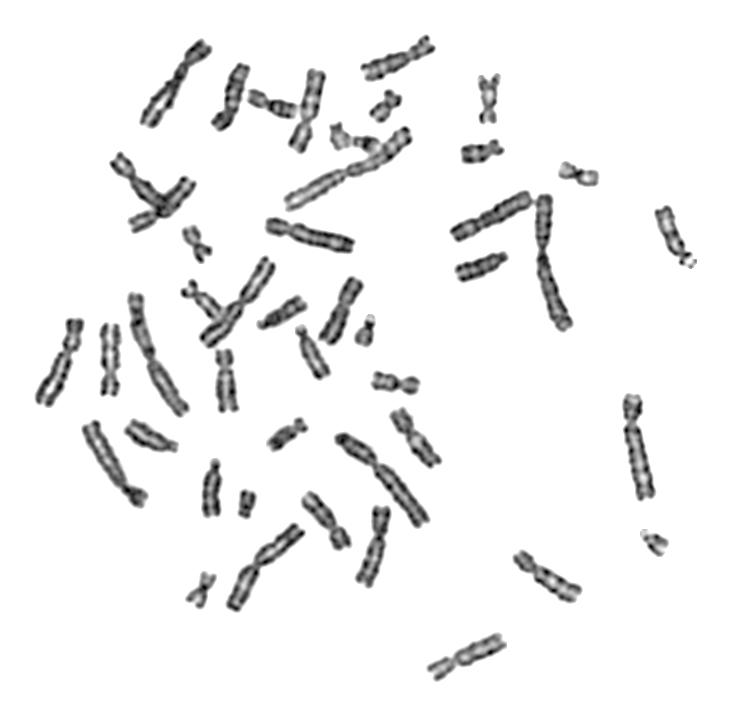

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Project/รูปโครโมโซมสำหรับเทรน/01.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

# **ปรับรูป**
ปรับรูปภาพที่มีขนาด px ไม่เท่ากัน ให้มีความกว้างความยาวเท่ากัน โดยไม่บีบอัดรูป โดยสามารถแทนที่ว่างได้ด้วย สีขาว 

### ตรวจ เช็คขนาด pixel

In [ ]:
 img = cv2.imread('/content/drive/MyDrive/Project/รูปโครโมโซมสำหรับเทรน/01.jpg') # แสดงขนาดของรูปภาพ
print('Width:', img.shape[1])
print('Height:', img.shape[0])
# อ่านค่า pixel ที่ตำแหน่ง (x, y)
x = 100
y = 200
pixel = img[y, x]
print('Pixel value:', pixel)

Width: 732
Height: 717
Pixel value: [255 255 255]


In [ ]:
 img = cv2.imread('/content/drive/MyDrive/Project/รูปโครโมโซมสำหรับเทรน/02.jpg')
 # แสดงขนาดของรูปภาพ
print('Width:', img.shape[1])
print('Height:', img.shape[0])
# อ่านค่า pixel ที่ตำแหน่ง (x, y)
x = 100
y = 200
pixel = img[y, x]
print('Pixel value:', pixel)

Width: 732
Height: 717
Pixel value: [255 255 255]


In [ ]:
 img = cv2.imread('/content/drive/MyDrive/Project/รูปโครโมโซมสำหรับเทรน/100.jpg')
 # แสดงขนาดของรูปภาพ
print('Width:', img.shape[1])
print('Height:', img.shape[0])
# อ่านค่า pixel ที่ตำแหน่ง (x, y)
x = 100
y = 200
pixel = img[y, x]
print('Pixel value:', pixel)

Width: 1448
Height: 1287
Pixel value: [255 255 255]


## **ปรับภาพ** SQUARE



เราสามารถปรับขนาดรูปภาพให้มีขนาด 1000x1000 และเติมพื้นที่ว่างด้วยสีขาวได้ดังนี้:


อ่านรูปภาพจากไฟล์

หาขนาดของรูปภาพปัจจุบัน

หาว่าต้องเติมเพิ่มเท่าไหร่ในแนวนอนและแนวตั้ง

สร้างรูปภาพใหม่ที่มีขนาด 1000x1000 ด้วยสีขาว

นำรูปภาพเดิมไปวางตำแหน่งในรูปภาพใหม่

บันทึกภาพใหม่ลงไฟล์



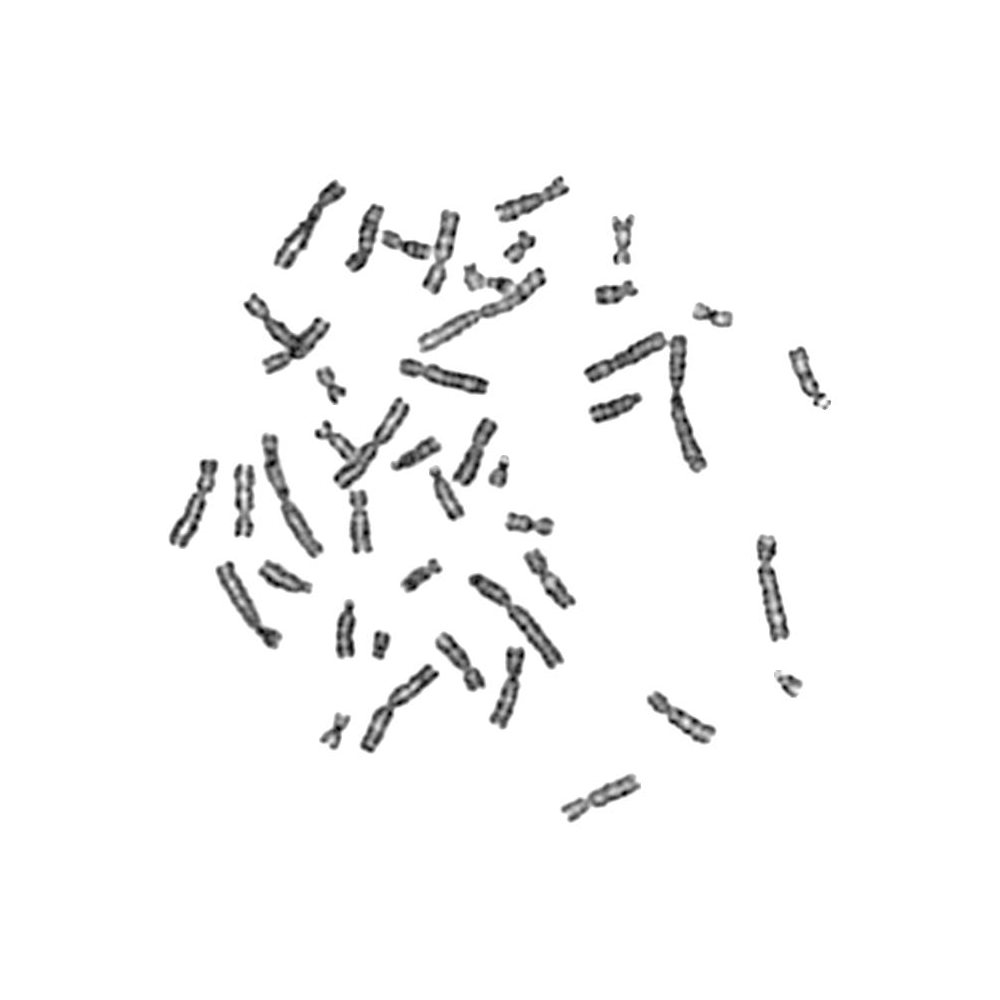

In [ ]:
from PIL import Image

# อ่านรูปภาพจากไฟล์
img = Image.open("/content/drive/MyDrive/Project/รูปโครโมโซมสำหรับเทรน/01.jpg")

# หาขนาดของรูปภาพปัจจุบัน
width, height = img.size

# หาว่าต้องเติมเพิ่มเท่าไหร่ในแนวนอนและแนวตั้ง
delta_w = 1000 - width
delta_h = 1000 - height
# สร้างรูปภาพใหม่ที่มีขนาด 1000x1000 ด้วยสีขาว
new_img = Image.new("RGB", (1000, 1000), (255, 255, 255))
# นำรูปภาพเดิมไปวางตำแหน่งในรูปภาพใหม่
new_img.paste(img, (delta_w // 2, delta_h // 2))

#โชว์
new_img

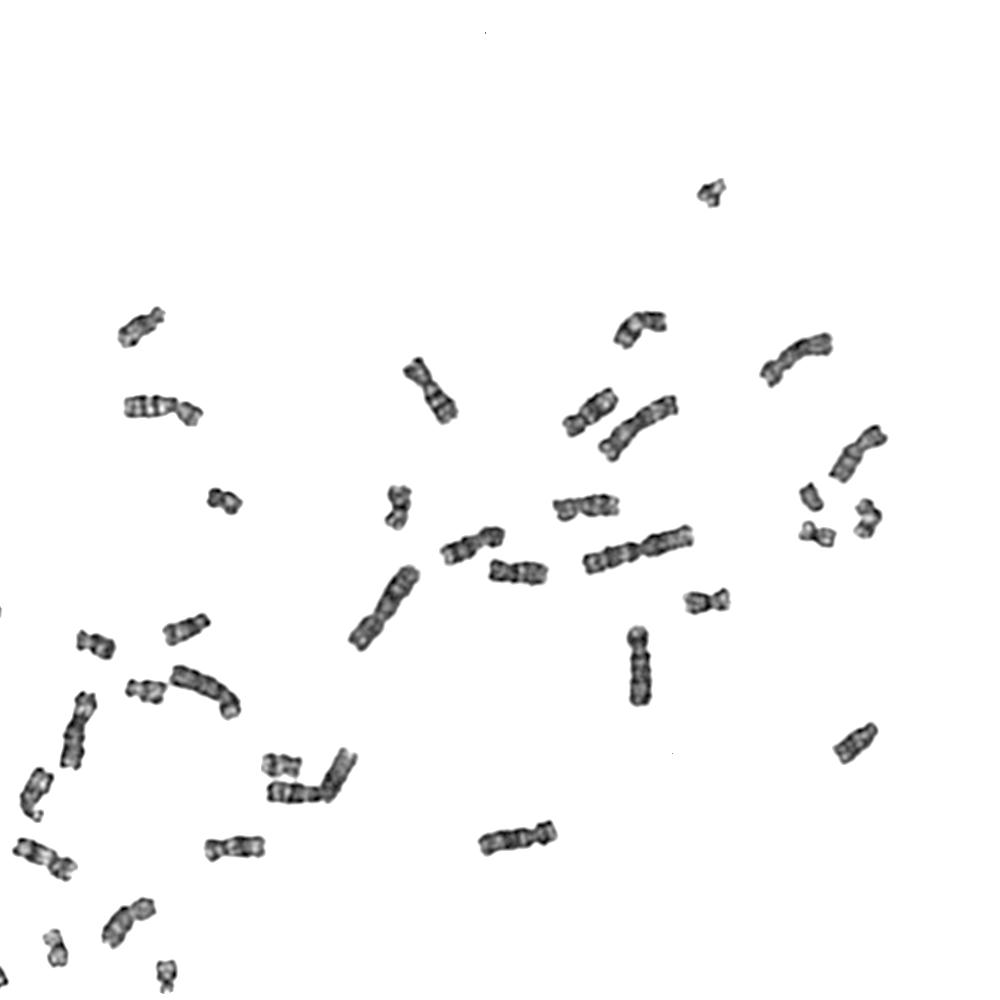

In [ ]:
from PIL import Image

# อ่านรูปภาพจากไฟล์
img = Image.open("/content/drive/MyDrive/Project/รูปโครโมโซมสำหรับเทรน/100.jpg")

# หาขนาดของรูปภาพปัจจุบัน
width, height = img.size

# หาว่าต้องเติมเพิ่มเท่าไหร่ในแนวนอนและแนวตั้ง
delta_w = 1000 - width
delta_h = 1000 - height
# สร้างรูปภาพใหม่ที่มีขนาด 1000x1000 ด้วยสีขาว
new_img = Image.new("RGB", (1000, 1000), (255, 255, 255))
# นำรูปภาพเดิมไปวางตำแหน่งในรูปภาพใหม่
new_img.paste(img, (delta_w // 2, delta_h // 2))

#โชว์
new_img

^ ข้อดี คือปรับรูปได้ เท่ากันที่ 1000 แต่ข้อเสียคือ รูปที่ใหญ่กว่า 1000 จะโดนตัด 

In [ ]:
from PIL import Image

# Load the image
img = Image.open("/content/drive/MyDrive/Project/รูปโครโมโซมสำหรับเทรน/100.jpg")


# Get the size of the image
width, height = img.size

# Determine the longer side
longer_side = max(width, height)

# Create a new square image with white background
square_img = Image.new('RGB', (longer_side, longer_side), (255, 255, 255))

# Paste the original image onto the center of the square image
x_offset = (longer_side - width) // 2
y_offset = (longer_side - height) // 2
square_img.paste(img, (x_offset, y_offset))

# Resize the square image to the size of the longer side
square_img = square_img.resize((longer_side, longer_side))

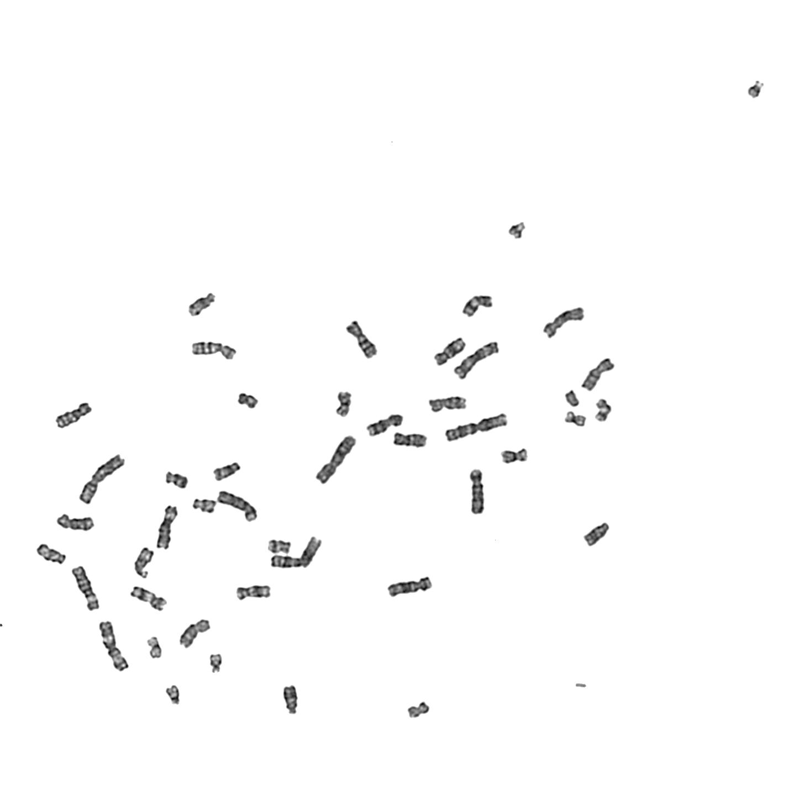

In [ ]:
# Load the image
img = square_img

# Change the resolution to 1000 pixels per inch
img = img.resize((800,800), resample=Image.BICUBIC, box=(0, 0, img.width, img.height), reducing_gap=None)
img.info['dpi'] = (1000,1000)
img

In [ ]:
from PIL import Image

# Load the image
img = Image.open("/content/drive/MyDrive/Project/รูปโครโมโซมสำหรับเทรน/10.jpg")


# Get the size of the image
width, height = img.size

# Determine the longer side
longer_side = max(width, height)

# Create a new square image with white background
square_img = Image.new('RGB', (longer_side, longer_side), (255, 255, 255))

# Paste the original image onto the center of the square image
x_offset = (longer_side - width) // 2
y_offset = (longer_side - height) // 2
square_img.paste(img, (x_offset, y_offset))

# Resize the square image to the size of the longer side
square_img = square_img.resize((longer_side, longer_side))

In [ ]:
# Load the image
img = square_img

# Change the resolution to 1000 pixels per inch
img = img.resize((800, 800), resample=Image.BICUBIC, box=(0, 0, img.width, img.height), reducing_gap=None)
img.info['dpi'] = (1000,1000)


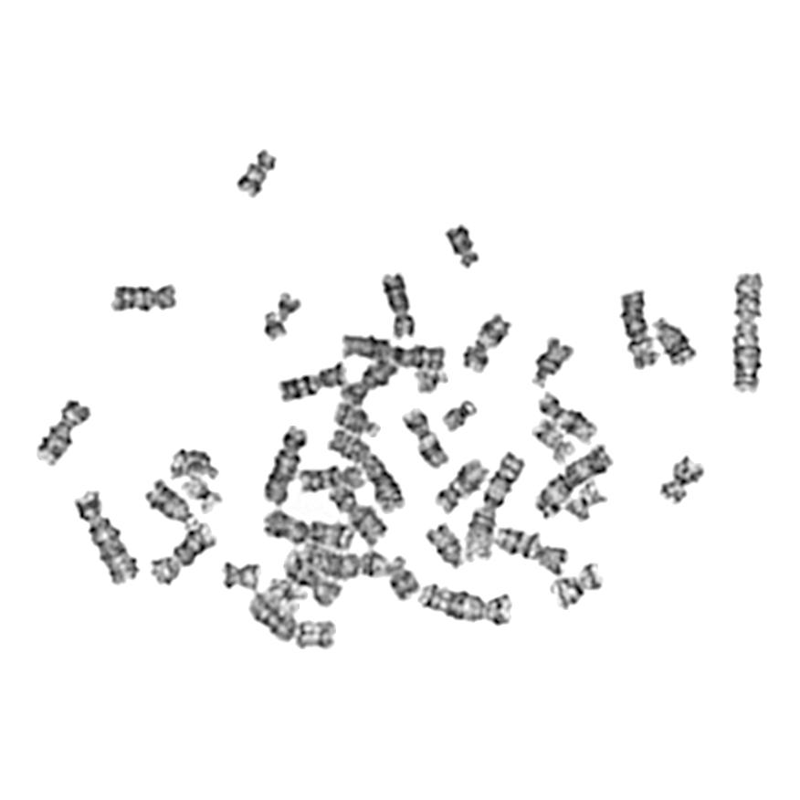

In [ ]:
from PIL import Image

# Load the image
img = Image.open("/content/drive/MyDrive/Project/รูปโครโมโซมสำหรับเทรน/14.jpg")


# Get the size of the image
width, height = img.size

# Determine the longer side
longer_side = max(width, height)

# Create a new square image with white background
square_img = Image.new('RGB', (longer_side, longer_side), (255, 255, 255))

# Paste the original image onto the center of the square image
x_offset = (longer_side - width) // 2
y_offset = (longer_side - height) // 2
square_img.paste(img, (x_offset, y_offset))

# Resize the square image to the size of the longer side
square_img = square_img.resize((longer_side, longer_side))
# Load the image
img = square_img

# Change the resolution to 1000 pixels per inch
img = img.resize((800, 800), resample=Image.BICUBIC, box=(0, 0, img.width, img.height), reducing_gap=None)
img.info['dpi'] = (1000,1000)
img

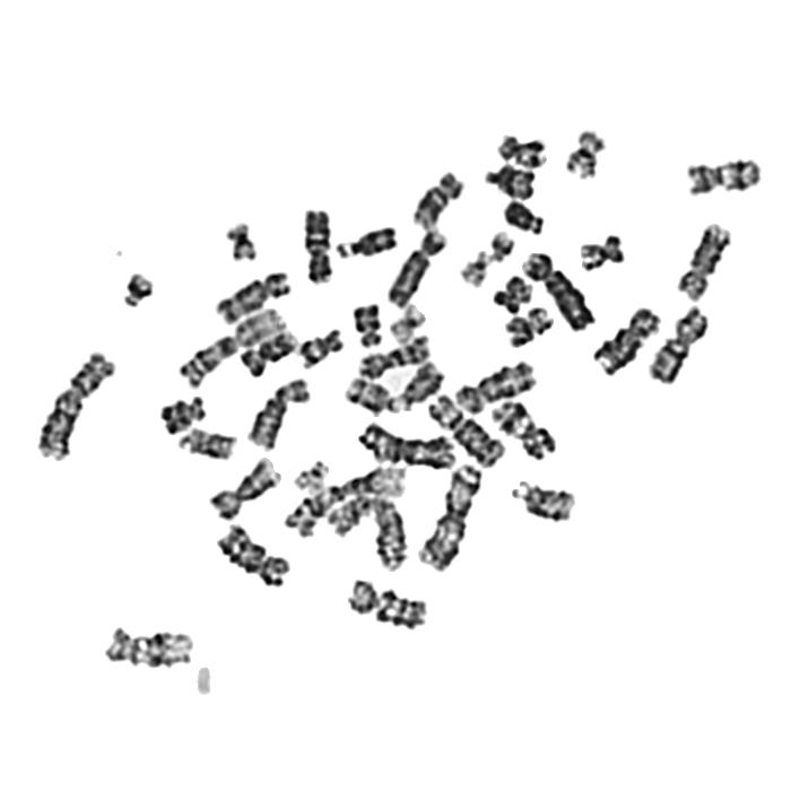

In [ ]:
from PIL import Image

# Load the image
img = Image.open("/content/drive/MyDrive/Project/รูปโครโมโซมสำหรับเทรน/11.jpg")


# Get the size of the image
width, height = img.size

# Determine the longer side
longer_side = max(width, height)

# Create a new square image with white background
square_img = Image.new('RGB', (longer_side, longer_side), (255, 255, 255))

# Paste the original image onto the center of the square image
x_offset = (longer_side - width) // 2
y_offset = (longer_side - height) // 2
square_img.paste(img, (x_offset, y_offset))

# Resize the square image to the size of the longer side
square_img = square_img.resize((longer_side, longer_side))
# Load the image
img = square_img

# Change the resolution to 1000 pixels per inch
img = img.resize((800, 800), resample=Image.BICUBIC, box=(0, 0, img.width, img.height), reducing_gap=None)
img.info['dpi'] = (1000,1000)
img

## ส่วนใหม่ปรับค่าพิกเซลของภาพให้อยู่ในช่วง [0, 1]

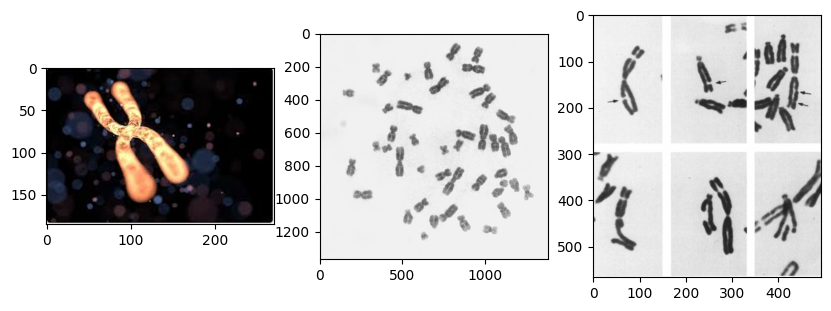

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(10,5))
image = cv.imread('/content/drive/MyDrive/Project/รูปอื่นๆ/images.jpg')
ax[0].imshow(image)
image = cv.imread('/content/drive/MyDrive/Project/รูปอื่นๆ/chromosome.jpg')
ax[1].imshow(image)
image = cv.imread('/content/drive/MyDrive/Project/รูปอื่นๆ/t1.jpg')
ax[2].imshow(image)
fig.show()

In [ ]:
!pip install opencv-python
!pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Next, you need to download the pre-trained YOLO model weights and configuration files. You can download them from the official website:

In [ ]:
import cv2

net = cv2.dnn.readNet("yolo/yolov3.weights", "yolo/yolov3.cfg")


error: ignored